# Analyze IMGEP experiment

## Imports and Plot utils

In [1]:
from autodiscjax import DictTree
from copy import copy
import itertools
import experiment_config
import exputils
import jax.numpy as jnp
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import os

In [2]:
default_layout = dict(
    title="",
    font=dict(
        size=12,
    ),
    plot_bgcolor="white",
    margin=dict(t=30, l=30, r=30, b=30),
    width=600,
    height=500,
    xaxis=dict(
        title="",
        # range=[0, 30],
        linecolor="#d9d9d9",
        showgrid=False,
        # mirror=True,
    ),
    yaxis=dict(
        title="",
        # range=[0, 30],
        linecolor="#d9d9d9",
        showgrid=False,
        # mirror=True,
    ),
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99
    ),
    showlegend=True,
)

## Load Experiment Config, Logs and History

In [3]:
batch_size = experiment_config.batch_size
pipeline_config = experiment_config.get_pipeline_config()
n_random_batches = pipeline_config.n_random_batches
n_imgep_batches = pipeline_config.n_imgep_batches

In [4]:
experiment_log = exputils.data.Logger()
experiment_log.load(pipeline_config.experiment_logging_save_folder)
print(jnp.array(experiment_log["IM_vals"]).shape)

(4, 50)


In [5]:
experiment_history_filepath = os.path.join(pipeline_config.experiment_data_save_folder, "experiment_history.pickle")
experiment_history = DictTree.load(experiment_history_filepath)

## IMGEP analysis

### Goal Space

[74.62954711914062, 22.496095657348633, -7.326875686645508, 8.69927978515625, 108.41572570800781, 33.99011993408203, 23.75010108947754, 24.389495849609375, 11.186044692993164, -3.4063491821289062, 69.12777709960938, 94.29967498779297, 92.91240692138672, 74.22618865966797, 70.71587371826172, 71.20918273925781, 63.688934326171875, 7.573310852050781, 9.552940368652344, 20.922901153564453, -26.01618194580078, 81.52311706542969, -19.180461883544922, 33.14828109741211, 13.761833190917969, 69.24794006347656, 23.027172088623047, -4.370372772216797, 119.58610534667969, 15.588701248168945, 26.455904006958008, 57.11347198486328, 58.44729232788086, -10.061644554138184, 37.96923828125, 45.50682067871094, 23.498004913330078, 85.79576873779297, 4.19826602935791, 37.056331634521484, 64.77024841308594, 34.623191833496094, 136.85519409179688, 40.66575622558594, 31.49024772644043, 30.578548431396484, 36.78184509277344, 59.037437438964844, 25.420333862304688, 44.39680480957031]


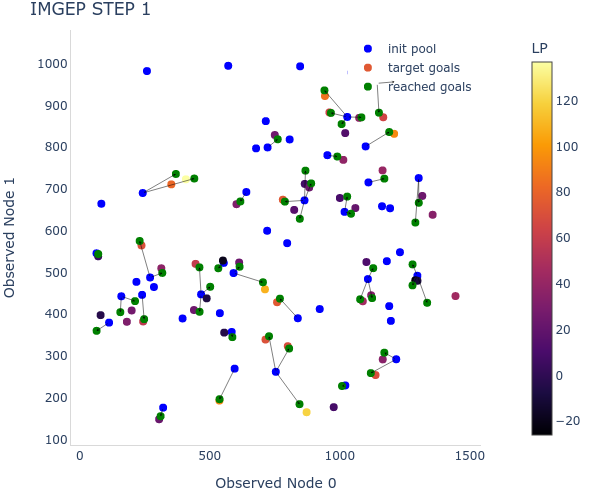

[-7.152830123901367, 60.510658264160156, 69.61322021484375, 48.51467514038086, 26.25873374938965, 49.731014251708984, 63.0662841796875, 31.127395629882812, 16.315563201904297, -14.676668167114258, 24.89568328857422, 35.169124603271484, 24.638160705566406, 20.91632080078125, 211.12078857421875, 19.03183937072754, -5.987310409545898, 39.66963195800781, 64.05819702148438, 44.03284454345703, 20.847150802612305, -23.531837463378906, 36.802757263183594, -0.15908241271972656, 38.56620788574219, 0.5264148712158203, 56.72404098510742, 89.53874969482422, -3.4336776733398438, 37.6956787109375, 49.60444259643555, 19.664871215820312, 29.053667068481445, 4.165616989135742, 37.25094223022461, 21.9975643157959, -26.186786651611328, 8.689299583435059, 32.27655029296875, 54.034645080566406, 56.54484558105469, -9.793375015258789, 0.41226959228515625, 26.754310607910156, 26.092823028564453, -22.438060760498047, 10.568706512451172, 77.31825256347656, 24.002655029296875, 53.11027145385742]


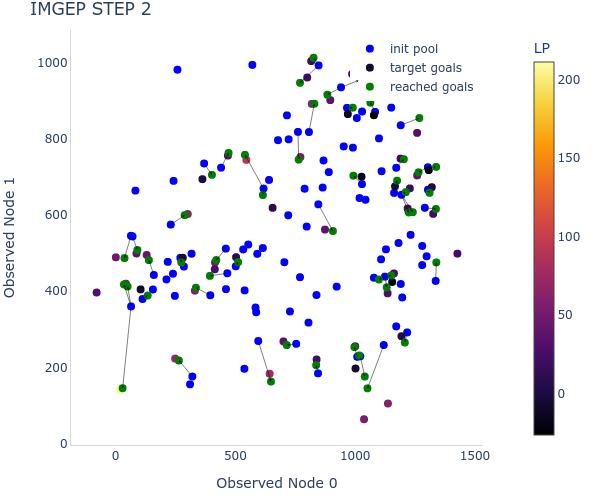

[1.9187564849853516, 67.86917114257812, 25.61913299560547, 7.064868927001953, 3.0371265411376953, -0.2464752197265625, 14.495241165161133, 73.08015441894531, -10.230581283569336, -2.3268604278564453, 7.561661243438721, 25.640085220336914, 24.153656005859375, -9.049626350402832, 34.013336181640625, 19.108407974243164, 9.986976623535156, 57.80666732788086, 12.754850387573242, -5.114795684814453, -3.8657188415527344, 35.307647705078125, 131.59483337402344, 15.43399429321289, 19.44451141357422, 19.174774169921875, 4.739109039306641, -1.9197769165039062, 7.1179046630859375, -4.426322937011719, 80.34577941894531, 36.63987731933594, 53.570072174072266, -13.24003791809082, 133.86338806152344, 22.998245239257812, 49.411537170410156, 78.16539764404297, 5.556434631347656, 8.306270599365234, 86.80240631103516, 4.100860595703125, 2.6572976112365723, -17.646499633789062, 42.22518539428711, -0.5657901763916016, -14.91649055480957, 64.97867584228516, 2.0365982055664062, 101.24943542480469]


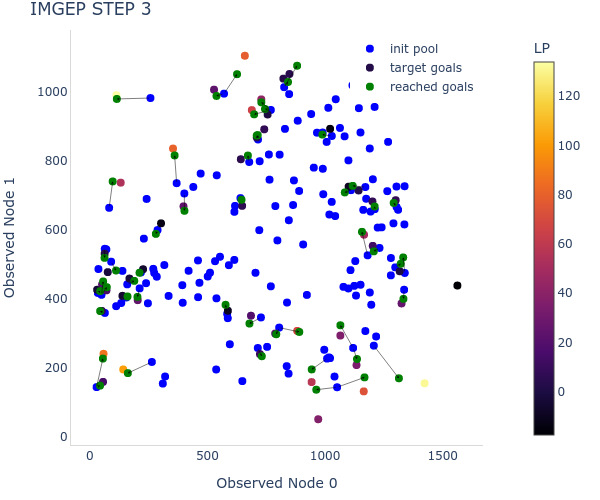

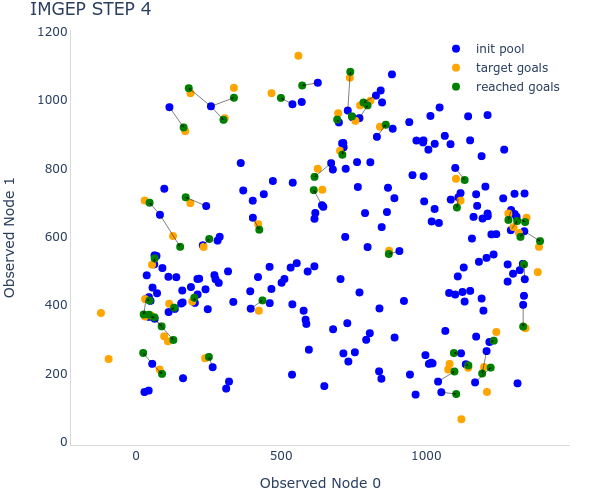

In [6]:
for imgep_step_idx in range(1, n_imgep_batches + 1):

    starting_points = experiment_history.reached_goal_embedding_library[
        : imgep_step_idx * batch_size
    ]
    target_goal_points = experiment_history.target_goal_embedding_library[
        imgep_step_idx * batch_size : (imgep_step_idx + 1) * batch_size
    ]
    selected_starting_points = experiment_history.reached_goal_embedding_library[
        experiment_history.source_intervention_library[
            imgep_step_idx * batch_size : (imgep_step_idx + 1) * batch_size
        ]
    ]
    reached_points = experiment_history.reached_goal_embedding_library[
        imgep_step_idx * batch_size : (imgep_step_idx + 1) * batch_size
    ]
    if "IM_vals" in experiment_log and imgep_step_idx<n_imgep_batches:
        target_goals_color =  experiment_log["IM_vals"][imgep_step_idx]
        print(target_goals_color)
        target_goals_colorbar = dict(title="LP", thickness=20, x=1.1)
    else:
        target_goals_color = "orange"
        target_goals_colorbar = None

    init_pool = go.Scatter(
        x=starting_points[:, 0],
        y=starting_points[:, 1],
        text=list(range(imgep_step_idx * batch_size)),
        mode="markers",
        marker=dict(color="blue", size=8),
        name="init pool",
    )

    target_goals = go.Scatter(
        x=target_goal_points[:, 0],
        y=target_goal_points[:, 1],
        text=list(
            range(imgep_step_idx * batch_size, (imgep_step_idx + 1) * batch_size)
        ),
        mode="markers",
        marker=dict(color=target_goals_color, size=8, colorscale="Inferno", colorbar=target_goals_colorbar),
        name="target goals",
    )

    reached_goals = go.Scatter(
        x=reached_points[:, 0],
        y=reached_points[:, 1],
        text=list(
            range(imgep_step_idx * batch_size, (imgep_step_idx + 1) * batch_size)
        ),
        mode="markers",
        marker=dict(color="green", size=8),
        name="reached goals",
    )

    arrows = [
        go.layout.Annotation(
            dict(
                x=x,
                y=y,
                xref="x",
                yref="y",
                text="",
                showarrow=True,
                axref="x",
                ayref="y",
                ax=ax,
                ay=ay,
                arrowhead=3,
                arrowwidth=0.5,
                arrowcolor="black",
            )
        )
        for (x, y, ax, ay) in zip(
            reached_points[:, 0],
            reached_points[:, 1],
            selected_starting_points[:, 0],
            selected_starting_points[:, 1],
        )
    ]

    layout = copy(default_layout)
    layout["title"] = f"IMGEP STEP {imgep_step_idx}"
    layout["xaxis"]["title"] = "Observed Node 0"
    layout["yaxis"]["title"] = "Observed Node 1"
    layout["annotations"] = arrows
    fig = go.Figure(data=[init_pool, target_goals, reached_goals], layout=layout)
    fig.show("png")

### Parameter Space

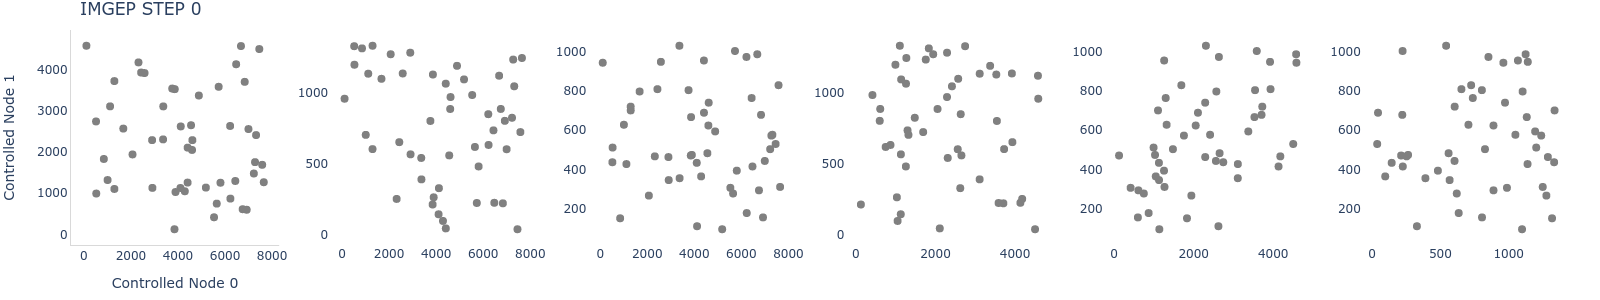

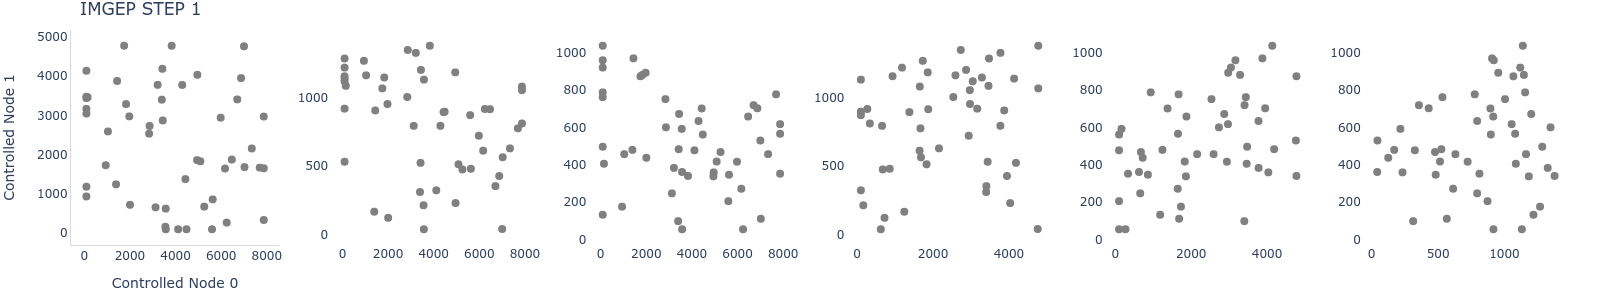

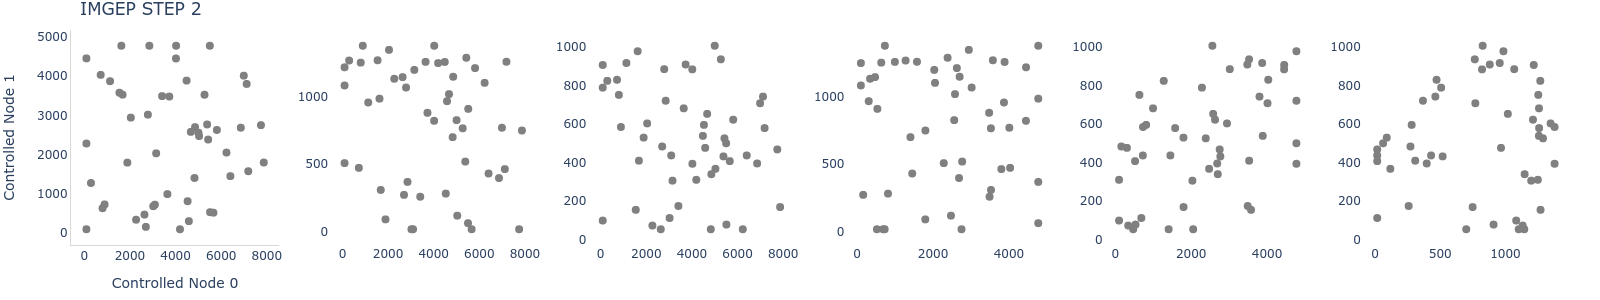

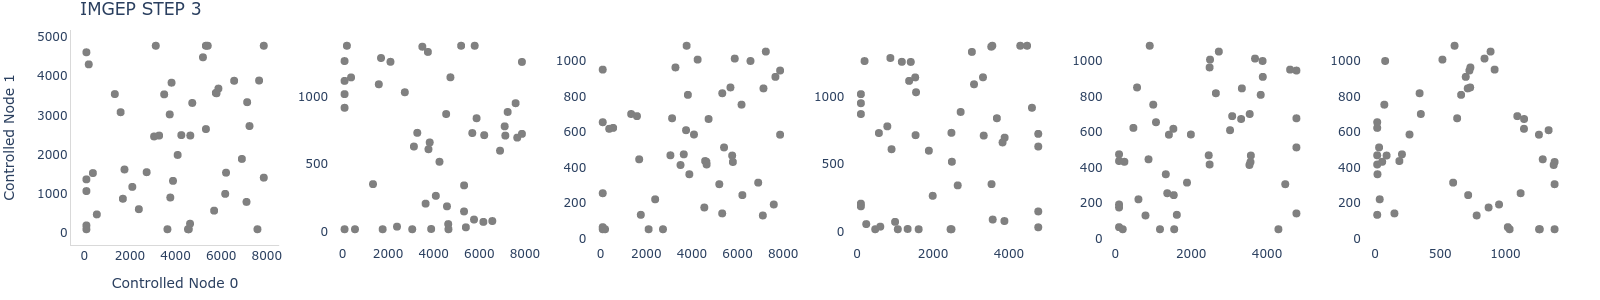

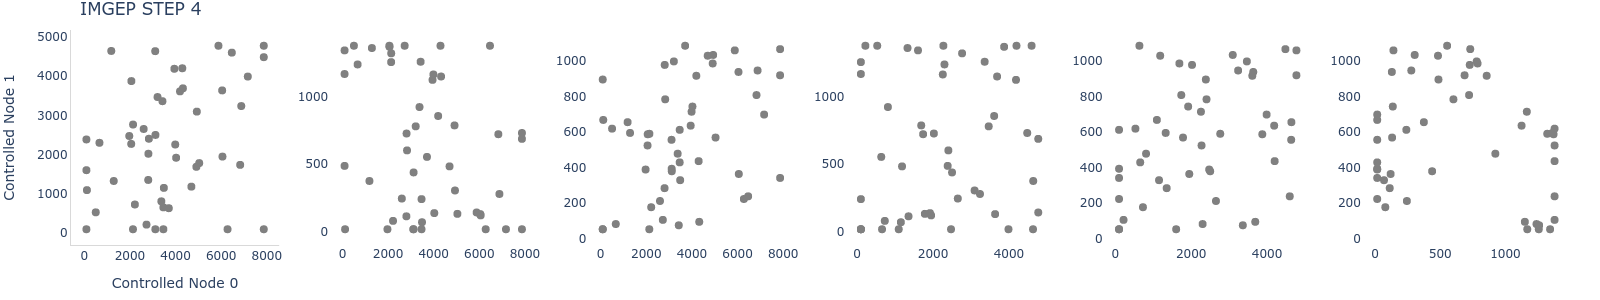

In [7]:
controlled_node_ids = list(experiment_history.intervention_params_library.y.keys())
pair_combinations = list(itertools.combinations(controlled_node_ids, 2))
n_combinations = len(pair_combinations)

for imgep_step_idx in range(n_random_batches+n_imgep_batches):
    
    fig = make_subplots(rows=1, cols=n_combinations)
    
    for pair_idx, (node_1, node_2) in enumerate(pair_combinations):

        params_x = experiment_history.intervention_params_library.y[node_1][imgep_step_idx * batch_size : (imgep_step_idx + 1) * batch_size, 0]
        params_y = experiment_history.intervention_params_library.y[node_2][imgep_step_idx * batch_size : (imgep_step_idx + 1) * batch_size, 0]
        selected_params_x = params_x[experiment_history.source_intervention_library]
        selected_params_y = params_y[experiment_history.source_intervention_library]
        
        
        fig.add_trace(go.Scatter(
            x=params_x,
            y=params_y,
            text=list(range(n_imgep_batches * batch_size)),
            mode="markers",
            marker=dict(color="grey", size=8),
            name="intervention_params",
        ), row=1, col=pair_idx+1)

        # arrows = [
        #     go.layout.Annotation(
        #         dict(
        #             x=x,
        #             y=y,
        #             xref="x",
        #             yref="y",
        #             text="",
        #             showarrow=True,
        #             axref="x",
        #             ayref="y",
        #             ax=ax,
        #             ay=ay,
        #             arrowhead=3,
        #             arrowwidth=0.5,
        #             arrowcolor="black",
        #         )
        #     )
        #     for (x, y, ax, ay) in zip(
        #         params_x[100:],
        #         params_y[100:],
        #         selected_params_x[100:],
        #         selected_params_y[100:],
        #     )
        # ]


    layout = copy(default_layout)
    layout["title"] = f"IMGEP STEP {imgep_step_idx}"
    layout["xaxis"]["title"] = "Controlled Node 0"
    layout["yaxis"]["title"] = "Controlled Node 1"
    layout["width"] = 1600
    layout["height"] = 300
    layout["showlegend"] = False
    fig.update_layout(layout)
    fig.show("png")

### Local Optimizer 
#### Progress

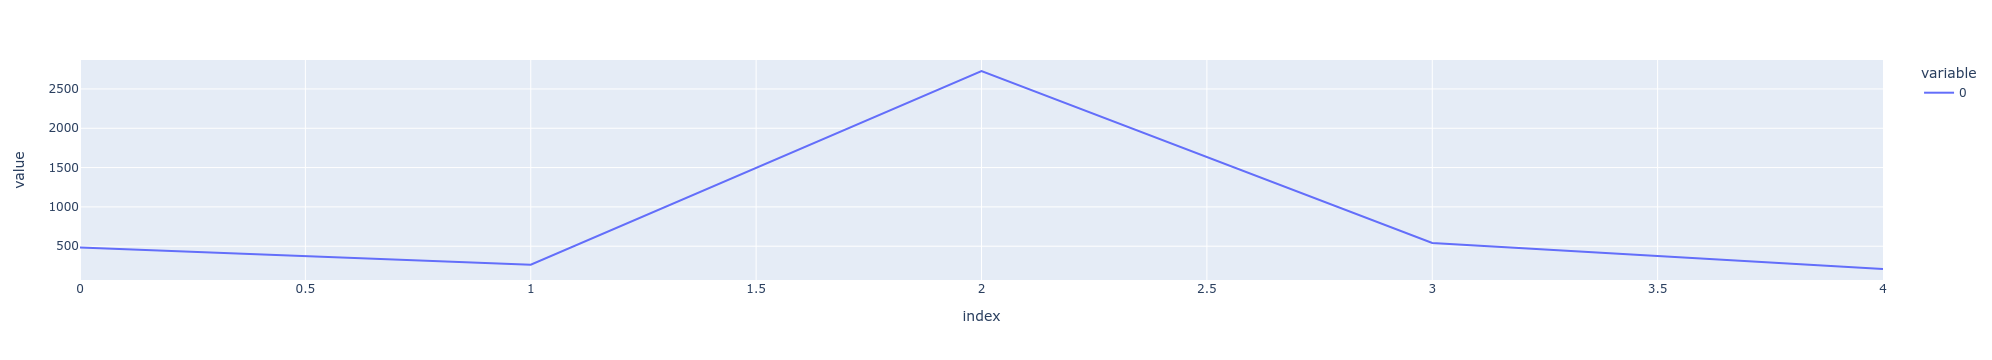

In [8]:
px.line(experiment_log["train_loss"][0][0])

#### Compute Time

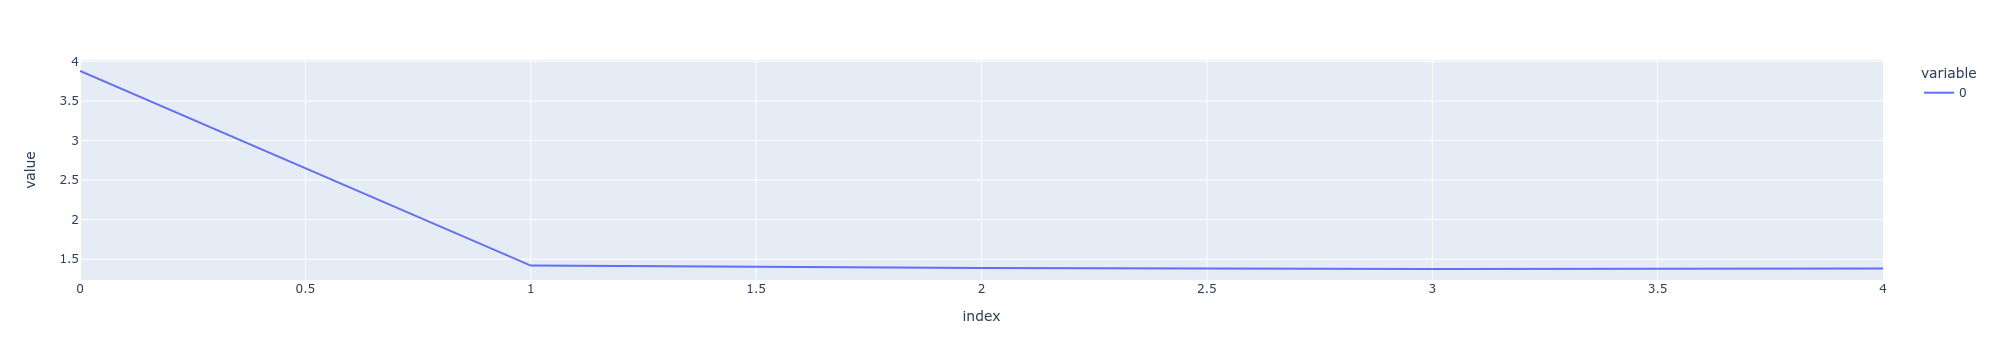

In [9]:
px.line(experiment_log["trainstep_time"][0][0])